# Bigmart Sale Prediction

According to the information provided, Bigmart is a big supermarket chain, with stores all around the country and its current board set out a challenge to all Data Scientist out there to help them create a model that can predict the sales, per product, for each store. BigMart has collected sales data from the year 2013, for 1559 products across 10 stores in different cities. With this information the corporation hopes we can identify the products and stores which play a key role in their sales and use that information to take the correct measures to ensure success of their business.

In [180]:
import numpy as np
import pandas as pd

In [2]:
test=pd.read_csv("C:/Users/MANIK/Downloads/big-mart-sales-prediction/test.csv")

In [3]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
train=pd.read_csv("C:/Users/MANIK/Downloads/big-mart-sales-prediction/train.csv")

In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### regarding Item_Visibility there are items with the value zero . This does not make lot of sense, since this is indicating those items are not visible on the store.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


#### Most of the items in the train dataset present 8523 non-null values. However, there are some cases such as Item_Weight and Outlet_Size which seem to present Null values. We always have to consider if this absence of values has a significant meaning. In this case it does not since all values should have weight higher than 0 and a stores cannot exist with zero size.

In [8]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Our goal is to identify the most important variables and to define the best regression model for predicting out target variable. Hence, this analysis will be divided into five stages:
#### Exploratory data analysis (EDA);
#### Data Pre-processing;
#### Feature engineering;
#### Feature Transformation;
#### Modeling;
#### Hyperparameter tuning
#### Ensembling.

# 1. Exploratory Data Analysis (EDA)

##### the goal for this section is to take a glimpse on the data as well as any irregularities so that we can correct on the next section, Data Pre-Processing.

In [9]:
idsUnique = len(set(train.Item_Identifier))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique

In [10]:
idsDupli

6964

In [11]:
train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

### 1.1. Univariate Analysis
##### To get an idea of the distribution of numerical variables, histograms are an excellent starting point. Let’s begin by generating one for item_Outlet_Sales, our target variable

Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

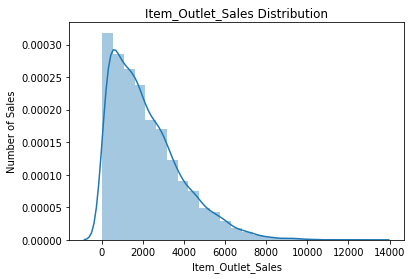

In [12]:
sns.distplot(train.Item_Outlet_Sales, bins = 25)
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

In [13]:
train.Item_Outlet_Sales.skew()

1.1775306028542798

### 1.1.2. Numerical Predictors

In [14]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

#### 1.1.2.1. Correlation between Numerical Predictors and Target variable

In [15]:
corr=numeric_features.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


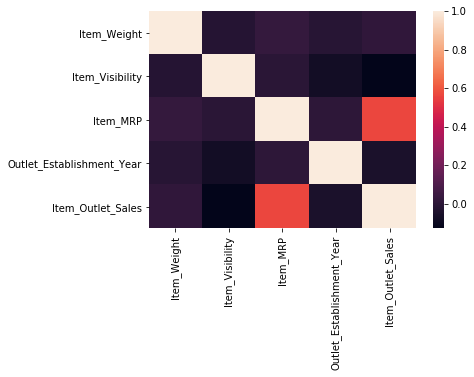

In [16]:
sns.heatmap(corr)

##### From the current numeric variables we can observe that the Item_Visibility is the feature with the lowest correlation with our target variable. Therefore, the less visible the product is in the store the higher the price will be. This is curious since from the initial assumptions this variables was expected to have high impact in the sales increase. Nevertheless, since this is not an expected behaviour and we should investigate. Moreover, this feature has a negative correlation with all of the other features. Furthermore, the most positive correlation belongs to Item_MRP .

## 1.1.3. Categorical Predictors
For categorical variables, bar charts and frequency counts are the natural counterparts to histograms. Now is time to look at the variables that contain some insight on the assumptions previously made.

#### Distribution of the variable Item_Fat_Content

In [17]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

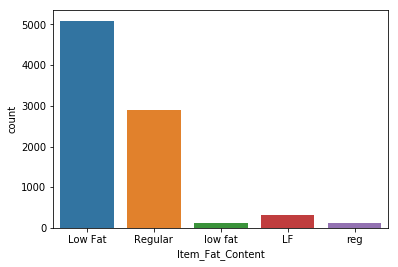

In [18]:
sns.countplot(train.Item_Fat_Content)

#### Distribution of the variable Item_Type

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

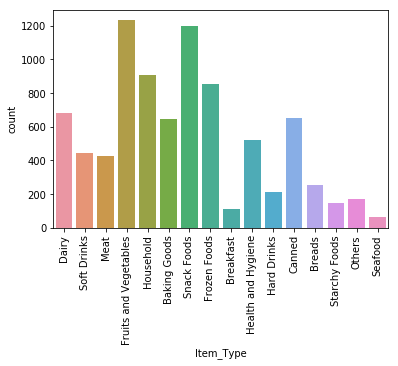

In [19]:
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)

#### Distribution of the variable Outlet_Size

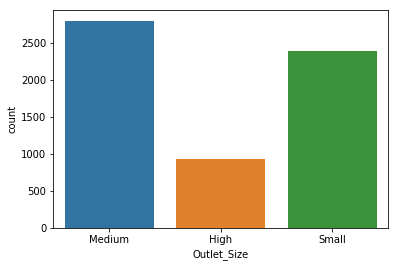

In [20]:
sns.countplot(train.Outlet_Size)

#### Distribution of the variable Outlet_Location_Type

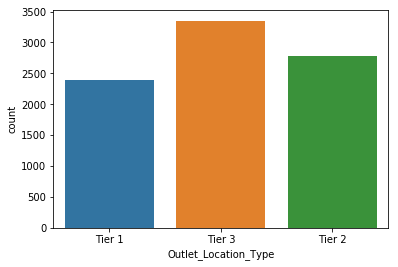

In [21]:
sns.countplot(train.Outlet_Location_Type)

#### Distribution of the variable Outlet_Type

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

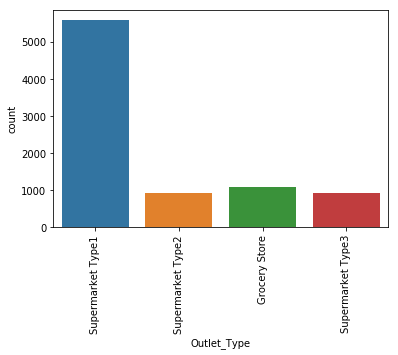

In [22]:
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=90)

# 1.2. Bivariate Analysis

Firstly we individually analysed some of the existent features, now it is time to understand the relationship between our target variable and predictors as well as the relationship among predictors.

#### Item_Weight and Item_Outlet_Sales analysis

Text(0, 0.5, 'Item_Outlet_Sales')

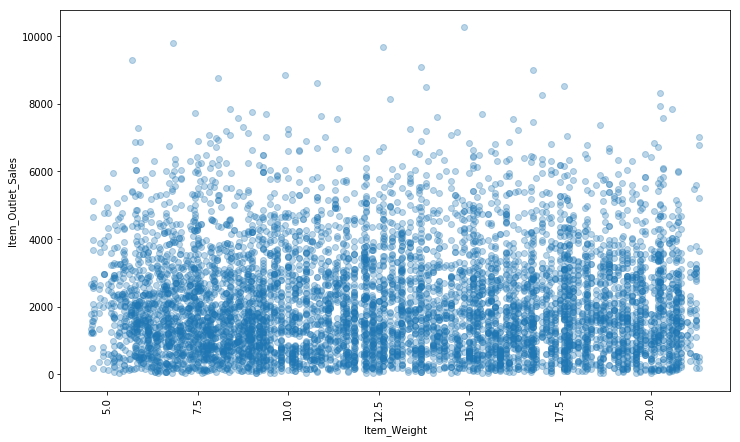

In [23]:
plt.figure(figsize=(12,7))
plt.scatter(train.Item_Weight,train.Item_Outlet_Sales,alpha=0.3)
plt.xticks(rotation=90)
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")

#### Item_Visibility and Item_Outlet_Sales analysis

Text(0, 0.5, 'Item_Outlet_Sales')

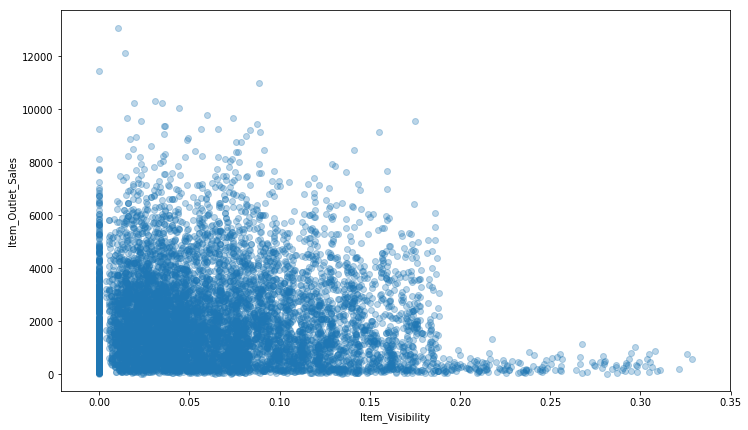

In [24]:
plt.figure(figsize=(12,7))
plt.scatter(train.Item_Visibility,train.Item_Outlet_Sales,alpha=0.3)
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")

#### Item_Type and Item_Outlet_Sales analysis

Text(0, 0.5, 'Item_Outlet_Sales')

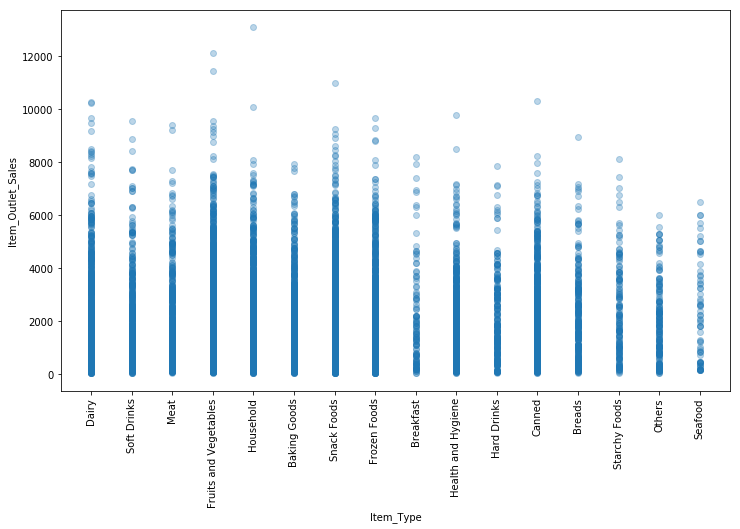

In [25]:
plt.figure(figsize=(12,7))
plt.scatter(train.Item_Type,train.Item_Outlet_Sales,alpha=0.3)
plt.xticks(rotation=90)
plt.xlabel("Item_Type")
plt.ylabel("Item_Outlet_Sales")

#### Item_Type and Item_Visibility analysis

Text(0, 0.5, 'Item_Visibility')

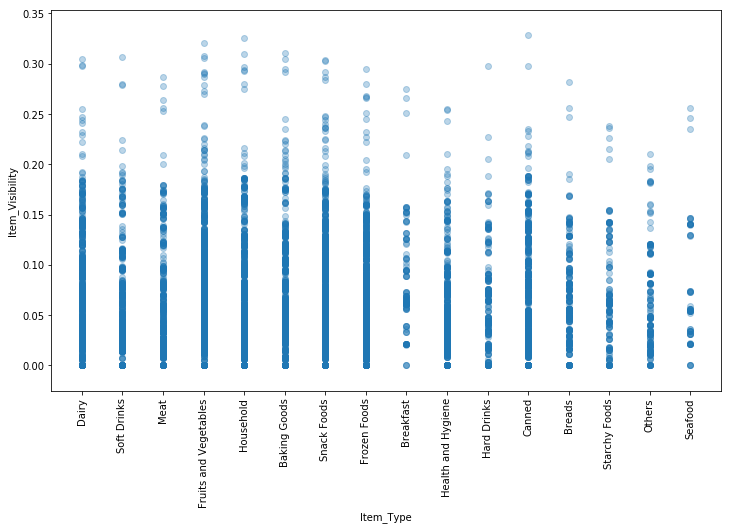

In [26]:
plt.figure(figsize=(12,7))
plt.scatter(train.Item_Type,train.Item_Visibility,alpha=0.3)
plt.xticks(rotation=90)
plt.xlabel("Item_Type")
plt.ylabel("Item_Visibility")

#### Outlet_Establishment_Year and Item_Outlet_Sales analysis

Text(0, 0.5, 'Item_Outlet_Sales')

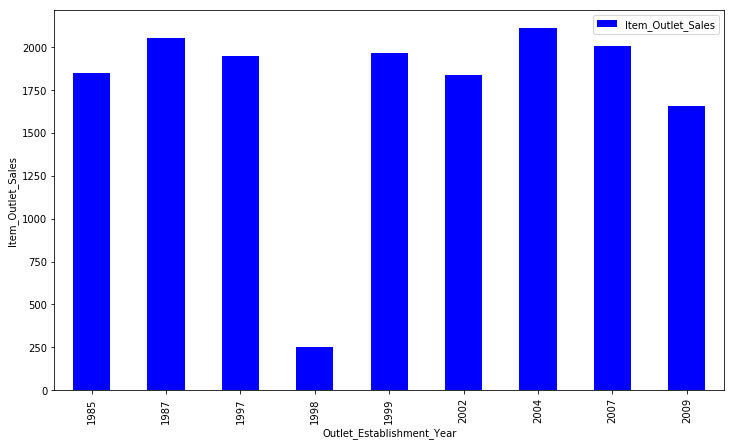

In [27]:
Outlet_Establishment_Year_pivot =train.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xticks(rotation=90)
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Item_Outlet_Sales")

#### Impact of Item_Fat_Content onItem_Outlet_Sales

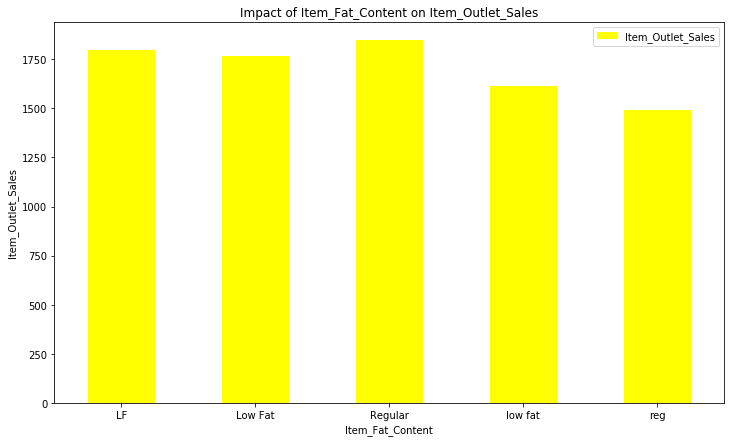

In [28]:
Item_Fat_Content_pivot = \
train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='yellow',figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

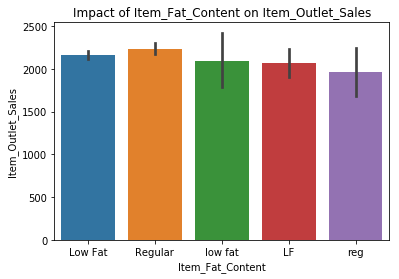

In [29]:
sns.barplot(x="Item_Fat_Content",y="Item_Outlet_Sales",data=train)
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)

### Impact of Outlet_Identifier on Item_Outlet_Sales

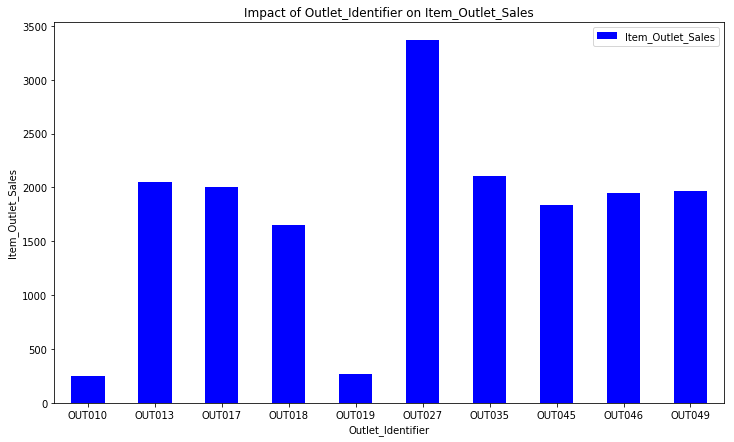

In [30]:
Outlet_Identifier_pivot = \
train.pivot_table(index="Outlet_Identifier", values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind="bar", color="blue",figsize=(12,7))
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [31]:
train.pivot_table(values="Outlet_Type", columns="Outlet_Identifier",aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


### Impact of Outlet_Size on Item_Outlet_Sales

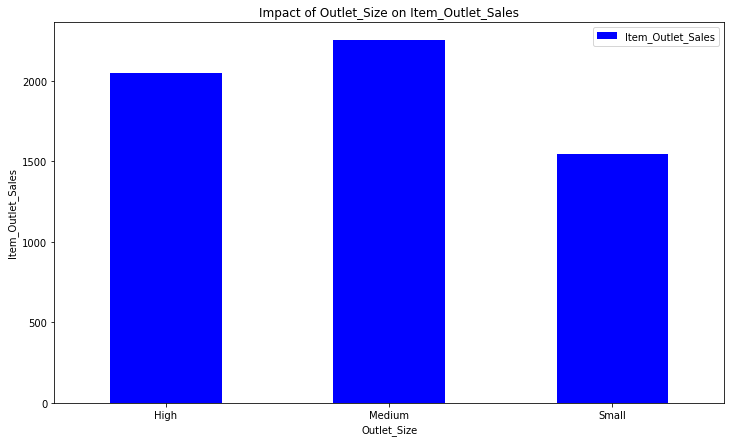

In [32]:
Outlet_Size_pivot = \
train.pivot_table(index="Outlet_Size", values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Size_pivot.plot(kind="bar", color="blue",figsize=(12,7))
plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

### Impact of Outlet_Type on Item_Outlet_Sales

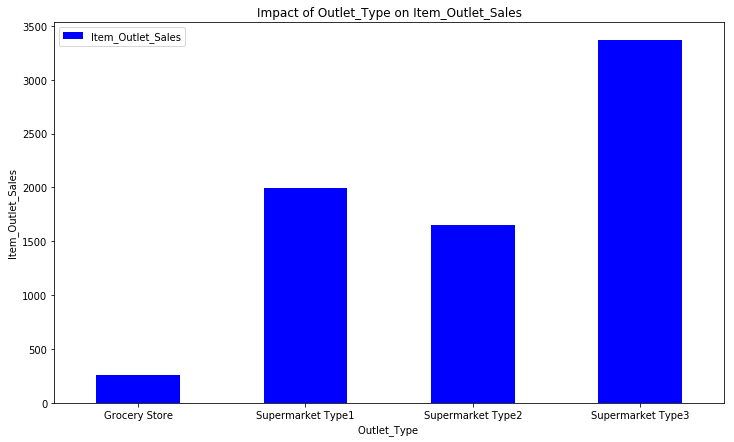

In [33]:
Outlet_Type_pivot = \
train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

### Impact of Outlet_Location_Type on Item_Outlet_Sales

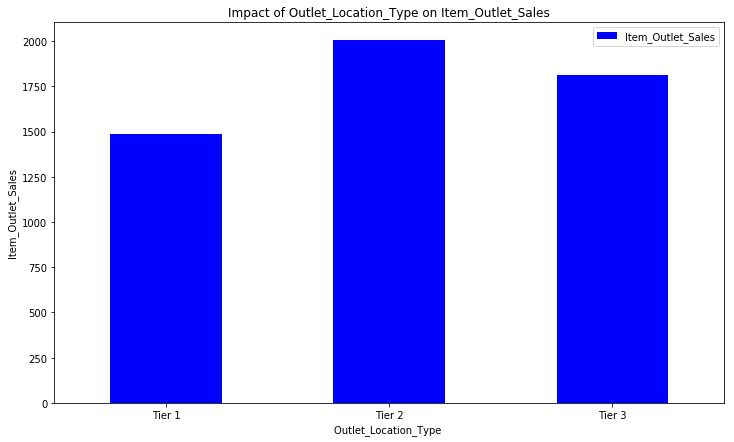

In [34]:
Outlet_Location_Type_pivot = \
train.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Location_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Location_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

## 2. Data Pre-Processing

#### Looking for missing values

In [35]:
# Join Train and Test Dataset
#Create source column to later separate the data easily
train['source']='train'
test['source']='test'
data = pd.concat([train,test], ignore_index = True)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [36]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

#### Imputing Missing Values
The Item_Weight and the Outlet_Size had missing values. Hence, for now we will impute for this missing values the mean for each corresponding variable.

In [37]:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')

In [38]:
print(item_avg_weight)

                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
DRB24                  8.785
DRB25                 12.300
DRB48                 16.750
DRC01                  5.920
DRC12                 17.850
DRC13                  8.260
DRC24                 17.850
DRC25                  5.730
DRC27                 13.800
DRC36                 13.000
DRC49                  8.670
DRD01                 12.100
DRD12                  6.960
DRD13                 15.000
DRD15                 10.600
DRD24                 13.850
DRD25                  6.135
DRD27                 18.750
DRD37                  9.800
DRD49                  9.895
DRD60                 15.700
DRE01                 10.100
DRE03                 19.600
DRE12                  4.590
DRE13                  6.280
...                      ...
NCX05                 15.200
NCX06         

In [39]:
data[:][data["Item_Identifier"] == "DRI11"]

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
18,Low Fat,DRI11,113.2834,2303.6680,Hard Drinks,0.034238,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
1366,Low Fat,DRI11,115.9834,345.5502,Hard Drinks,0.060237,NaN,1985,OUT019,Tier 1,Small,Grocery Store,train
3127,Low Fat,DRI11,113.3834,2073.3012,Hard Drinks,0.034458,8.26,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
5310,Low Fat,DRI11,113.7834,115.1834,Hard Drinks,0.057586,8.26,1998,OUT010,Tier 3,NaN,Grocery Store,train
7022,Low Fat,DRI11,115.7834,2073.3012,Hard Drinks,0.034398,8.26,2004,OUT035,Tier 2,Small,Supermarket Type1,train
7192,Low Fat,DRI11,116.0834,1267.0174,Hard Drinks,0.034544,8.26,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
8483,Low Fat,DRI11,117.0834,1612.5676,Hard Drinks,0.034474,8.26,2002,OUT045,Tier 2,NaN,Supermarket Type1,train
10246,Low Fat,DRI11,113.5834,NaN,Hard Drinks,0.034404,8.26,1997,OUT046,Tier 1,Small,Supermarket Type1,test
10674,Low Fat,DRI11,115.3834,NaN,Hard Drinks,0.034376,8.26,1987,OUT013,Tier 3,High,Supermarket Type1,test
12022,Low Fat,DRI11,115.9834,NaN,Hard Drinks,0.034599,8.26,2007,OUT017,Tier 2,NaN,Supermarket Type1,test


In [40]:
def impute_weight(cols):
    Weight = cols[0]
    Identifier = cols[1]
    
    if pd.isnull(Weight):
        return item_avg_weight['Item_Weight'][item_avg_weight.index == Identifier]
    else:
        return Weight
print ('Orignal #missing: %d'%sum(data['Item_Weight'].isnull()))
data['Item_Weight'] = data[['Item_Weight','Item_Identifier']].apply(impute_weight,axis=1).astype(float)
print ('Final #missing: %d'%sum(data['Item_Weight'].isnull()))

Orignal #missing: 2439
Final #missing: 0


In [41]:
#Import mode function:
from scipy.stats import mode
#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [42]:
def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size
print ('Orignal #missing: %d'%sum(data['Outlet_Size'].isnull()))
data['Outlet_Size'] = data[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)
print ('Final #missing: %d'%sum(data['Outlet_Size'].isnull()))

Orignal #missing: 4016
Final #missing: 0


# Feature Engineering

## Should we combine Outlet_Type?

In [43]:
data.pivot_table(values='Item_Outlet_Sales', columns='Outlet_Type')

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Outlet_Sales,339.8285,2316.181148,1995.498739,3694.038558


As observed by the results below, the average product sales are significantly different so we leave as is.

## Item_Visibility minimum value is 0

In [44]:
visibility_item_avg = data.pivot_table(values='Item_Visibility',index='Item_Identifier')
def impute_visibility_mean(cols):
    visibility = cols[0]
    item = cols[1]
    if visibility == 0:
        return visibility_item_avg['Item_Visibility'][visibility_item_avg.index == item]
    else:
        return visibility
print ('Original #zeros: %d'%sum(data['Item_Visibility'] == 0))
data['Item_Visibility'] = data[['Item_Visibility','Item_Identifier']].apply(impute_visibility_mean,axis=1).astype(float)
print ('Final #zeros: %d'%sum(data['Item_Visibility'] == 0))

Original #zeros: 879
Final #zeros: 0


## Determine the years of operation of a store

In [45]:
#Remember the data is from 2013
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

## Create a broad category of Item_Type

In [46]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

 ## Modify categories of Item_Fat_Content

In [47]:
#Change categories of low fat:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())
print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [48]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

## Categorical Variables — One Hot Encoding

Since scikit-learn only accepts numerical variables, we need to convert all categories of nominal variables into numeric types. Let’s start with turning all categorical variables into numerical values using LabelEncoder() (Encode labels with value between 0 and n_classes-1). After that, we can use get_dummies to generate dummy variables from these numerical categorical variables

In [49]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
for i in var_mod:
    data[i] = le.fit_transform(data[i])

 the Item_Fat_Content has 3 categories — LowFat,Regular,Non-Edible. One hot coding will remove this variable and generate 3 new variables. Each will have binary numbers — 0 (if the category is not present) and 1(if category is present). This can be done using get_dummies function of Pandas.

In [50]:
#Dummy Variables:
data = pd.get_dummies(data, columns =['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])
data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
O

# Exporting Data

Final step is to convert data back into train and test data sets. Its generally a good idea to export both of these as modified data sets so that they can be re-used for multiple sessions. This can be achieved using following code:

In [51]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]
#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)
#Export files as modified versions:
train.to_csv("C:/Users/MANIK/Downloads/big-mart-sales-prediction/train_modified.csv",index=False)
test.to_csv("C:/Users/MANIK/Downloads/big-mart-sales-prediction/test_modified.csv",index=False)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [65]:
train.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,0.016047,9.30,OUT049,14,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,OUT018,4,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,OUT049,14,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,0.017834,19.20,OUT010,15,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,0.009780,8.93,OUT013,26,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [98]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 33 columns):
Item_Identifier           8523 non-null object
Item_MRP                  8523 non-null float64
Item_Outlet_Sales         8523 non-null float64
Item_Visibility           8523 non-null float64
Item_Weight               8523 non-null float64
Outlet_Identifier         8523 non-null object
Outlet_Years              8523 non-null int64
Item_Fat_Content_0        8523 non-null uint8
Item_Fat_Content_1        8523 non-null uint8
Item_Fat_Content_2        8523 non-null uint8
Outlet_Location_Type_0    8523 non-null uint8
Outlet_Location_Type_1    8523 non-null uint8
Outlet_Location_Type_2    8523 non-null uint8
Outlet_Size_0             8523 non-null uint8
Outlet_Size_1             8523 non-null uint8
Outlet_Size_2             8523 non-null uint8
Outlet_Type_0             8523 non-null uint8
Outlet_Type_1             8523 non-null uint8
Outlet_Type_2             8523 non-null uint8
Outlet_Ty

# 5.Model Building

In [52]:
train_df = pd.read_csv('C:/Users/MANIK/Downloads/big-mart-sales-prediction/train_modified.csv')
test_df = pd.read_csv('C:/Users/MANIK/Downloads/big-mart-sales-prediction/test_modified.csv')

Since I’ll be making many models, instead of repeating the codes again and again, I would like to define a generic function which takes the algorithm and data as input and makes the model, performs cross-validation and generates submission.

### LINEAR REGRESSION MODEL

In [128]:
X=train_df.columns.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])

In [129]:
Y='Item_Outlet_Sales'

In [106]:
from sklearn import model_selection, metrics

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
lm=LinearRegression(normalize=True)

In [112]:
lm.fit(train_df[X],train_df[Y])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [113]:
lm.intercept_

-1775943272735866.8

In [146]:
m=lm.coef_

In [139]:
y_pred=lm.predict(train_df[X])
y_pred

array([4054.25,  565.25, 2372.25, ..., 1505.75, 1407.25, 1223.75])

In [140]:
train_sq = (train_df[Y])**2

In [144]:
RMSE=np.sqrt(metrics.mean_squared_error(train_sq.values,y_pred))
print("RMSE","=",RMSE)

RMSE = 13995554.097589215


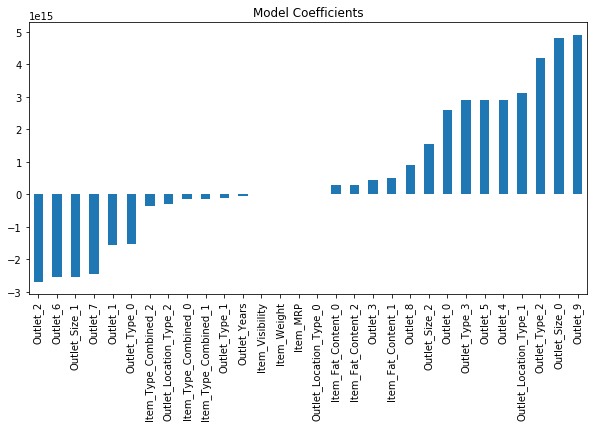

In [150]:
coef1 = pd.Series(m,X).sort_values()
coef1.plot(kind='bar', title='Model Coefficients',figsize=(10,5))

## RIDGE REGRESSION MODEL

In [151]:
from sklearn.linear_model import Ridge

In [152]:
RR = Ridge(alpha=0.05,normalize=True)

In [154]:
r=RR.coef_

In [161]:
pred=RR.predict(train_df[X])

In [153]:
RR.fit(train_df[X],train_df[Y])

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [163]:
RMSE=np.sqrt(metrics.mean_squared_error(train_sq.values,pred))
print("RMSE","=",RMSE)

RMSE = 13995577.68238779


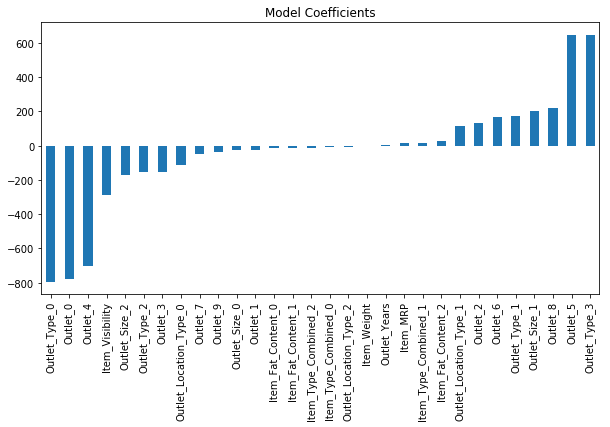

In [157]:
coef2 = pd.Series(r,X).sort_values()
coef2.plot(kind='bar', title='Model Coefficients',figsize=(10,5))

## DECISION TREE

In [156]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
DT.fit(train_df[X],train_df[Y])

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=100,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [159]:
dt=DT.feature_importances_

In [164]:
pred1=DT.predict(train_df[X])

In [165]:
RMSE=np.sqrt(metrics.mean_squared_error(train_sq.values,pred1))
print("RMSE","=",RMSE)

RMSE = 13995466.23773434


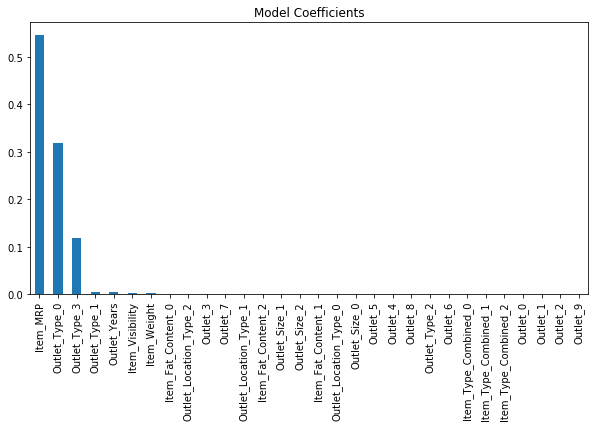

In [169]:
coef3 = pd.Series(dt,X).sort_values(ascending=False)
coef3.plot(kind='bar', title='Model Coefficients',figsize=(10,5))

## RANDOM FOREST MODEL

In [170]:
RF = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)

In [171]:
RF.fit(train_df[X],train_df[Y])

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=150,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [172]:
rf=DT.feature_importances_

In [174]:
pred2=RF.predict(train_df[X])

In [176]:
RMSE=np.sqrt(metrics.mean_squared_error(train_sq.values,pred2))
print("RMSE","=",RMSE)

RMSE = 13995478.064563587


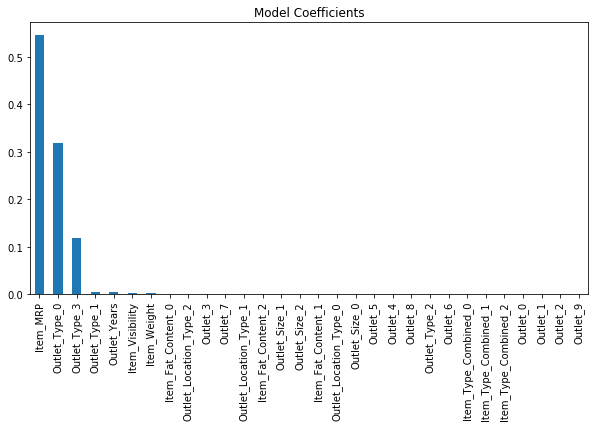

In [177]:
coef4 = pd.Series(rf,X).sort_values(ascending=False)
coef4.plot(kind='bar', title='Model Coefficients',figsize=(10,5))

# CONCLUSION

In [179]:
print("LINEAR REGRESSION MODEL=13995554.097589215")
print("RIDGE REGRESSION MODEL= 13995577.68238779")
print("RANDOM FOREST MODEL=    13995478.064563587")
print("DECISION TREE MODEL=    13995466.23773434")

LINEAR REGRESSION MODEL=13995554.097589215
RIDGE REGRESSION MODEL= 13995577.68238779
RANDOM FOREST MODEL=    13995478.064563587
DECISION TREE MODEL=    13995466.23773434


### The ML algorithm that perform the best was Decision Tree model with RMSE = 13995466.23773434